In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import re

In [2]:
url="https://weather.com/weather/tenday/l/San+Francisco+CA?canonicalCityId=dfdaba8cbe3a4d12a8796e1f7b1ccc7174b4b0a2d5ddb1c8566ae9f154fa638c"
output=requests.get(url)

In [3]:
output

<Response [200]>

In [4]:
soup=BeautifulSoup(output.content,"html.parser")

<!DOCTYPE html>
<html dir="ltr" lang="en-US"><head>
<meta charset="utf-8" data-react-helmet="true"/><meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/><meta content="max-image-preview:large" data-react-helmet="true" name="robots"/><meta content="index, follow" data-react-helmet="true" name="robots"/><meta content="origin" data-react-helmet="true" name="referrer"/><meta content="Be prepared with the most accurate 10-day forecast for San Francisco, CA with highs, lows, chance of precipitation from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/><meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/><meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/><meta content="#ffffff" data-react-helmet="true" name="theme-color"/><meta content="San Francisco, CA 10-Day Weather Forecast - The Weather Channel | Weather.c
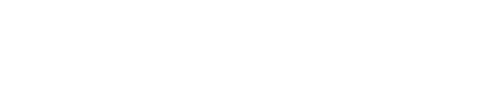
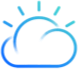

In [5]:
print(soup)

In [20]:
weather=soup.find_all("summary",class_="Disclosure--Summary--1iorL DaypartDetails--Summary--1AYJv Disclosure--hideBorderOnSummaryOpen--3KKqj")

In [21]:
weather

[<summary aria-expanded="false" class="Disclosure--Summary--1iorL DaypartDetails--Summary--1AYJv Disclosure--hideBorderOnSummaryOpen--3KKqj" role="button"><div class="DaypartDetails--DetailSummaryContent--3hfzd Disclosure--SummaryDefault--2EbAP"><div class="DetailsSummary--DetailsSummary--1iOrv DetailsSummary--fadeOnOpen--3M5nm" data-testid="DetailsSummary" id="titleIndex1"><h2 class="DetailsSummary--daypartName--3C7r4" data-testid="daypartName">Fri 30</h2><div class="DetailsSummary--temperature--35t70" data-testid="detailsTemperature"><span class="DetailsSummary--highTempValue--3neDD" data-testid="TemperatureValue">64°</span><span data-testid="lowTempValue">/<span class="DetailsSummary--lowTempValue--2wKBA" data-testid="TemperatureValue">55°</span></span></div><div class="DetailsSummary--condition--33r6t" data-testid="wxIcon"><svg aria-hidden="true" class="DetailsSummary--wxIcon--wqJ2y Icon--icon--1T0KB Icon--fullTheme--2S2Ql" data-testid="Icon" role="img" set="weather" skycode="30" t

In [22]:
weather[0].text

'Fri 3064°/55°Partly CloudyPartly CloudyRain14%WindW 18 mphArrow Down'

In [23]:
weather[1].text

'Sat 3163°/55°Partly CloudyPartly CloudyRain17%WindW 16 mphArrow Down'

In [24]:
weather[2].text

'Sun 0165°/55°Partly CloudyPartly CloudyRain8%WindW 18 mphArrow Down'

In [25]:
date=soup.find_all("h2",class_="DetailsSummary--daypartName--3C7r4")

In [27]:
date[0].text

'Today'

In [28]:
date[1].text

'Fri 30'

In [29]:
date_=[]
for i in date:
    x=i.text
    date_.append(x)

In [77]:
len(date_)

15

In [32]:
temp=soup.find_all("div",class_="DetailsSummary--temperature--35t70")

In [33]:
temp[0].text

'65°/55°'

In [34]:
temperature=[]
for i in temp:
    x=i.text
    temperature.append(x)

In [76]:
len(temperature)

15

In [61]:
humida=soup.find_all("span",class_="DetailsTable--value--3_Mfa")

In [62]:
humida[0].text

'83%'

In [63]:
humida[1].text

'9 of 10'

In [64]:
humida[2].text

'6:11 am'

In [65]:
humida[3].text

'8:21 pm'

In [66]:
humida[4].text

'89%'

In [68]:
humid=humida[0:4]

In [54]:
humidity_=[]
for i in humid:
    x=i.text
    humidity_.append(x)

In [79]:
len(humidity_)

15

In [78]:
humidity_=humidity_[0:15]

In [69]:
uv=humida[1::4]

In [70]:
uv

[<span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">9 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">0 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">10 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">0 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">9 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">0 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">10 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">0 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">10 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">0 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVIndexValue">10 of 10</span>,
 <span class="DetailsTable--value--3_Mfa" data-testid="UVInde

In [71]:
uvindex=[]
for i in uv:
    x=i.text
    uvindex.append(x)

In [81]:
len(uvindex)

15

In [80]:
uvindex=uvindex[0:15]

In [82]:
df_weather=pd.DataFrame({"Date":date_,"Temperature":temperature,"Humidity":humidity_,"UV INDEX":uvindex})

In [83]:
df_weather

,Date,Temperature,Humidity,UV INDEX
0,Today,65°/55°,83%,9 of 10
1,Fri 30,64°/55°,89%,0 of 10
2,Sat 31,63°/55°,82%,10 of 10
3,Sun 01,65°/55°,89%,0 of 10
4,Mon 02,64°/54°,81%,9 of 10
5,Tue 03,64°/55°,86%,0 of 10
6,Wed 04,65°/56°,76%,10 of 10
7,Thu 05,68°/57°,84%,0 of 10
8,Fri 06,68°/55°,74%,10 of 10
9,Sat 07,66°/55°,83%,0 of 10
